In [1]:
import os
import time
import librosa
import zipfile
import mutagen
import mutagen.wave
import numpy as np
import pandas as pd
import librosa.display
import IPython.display
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from PIL import Image
import json

In [2]:
# wav 파일 정보 읽어오기

import librosa
import librosa.display
import numpy as np
import wave

filename = './wav/6.가전_5761_1.wav'

obj=wave.open(filename,'r')
print( "Number of channels : ",obj.getnchannels())
print ( "Sampling rate : ",obj.getframerate())
print ("Number of samples : ",obj.getnframes())
print("Play time(s) :", obj.getnframes()/obj.getframerate())
obj.close()

Number of channels :  2
Sampling rate :  44100
Number of samples :  1237005
Play time(s) : 28.05


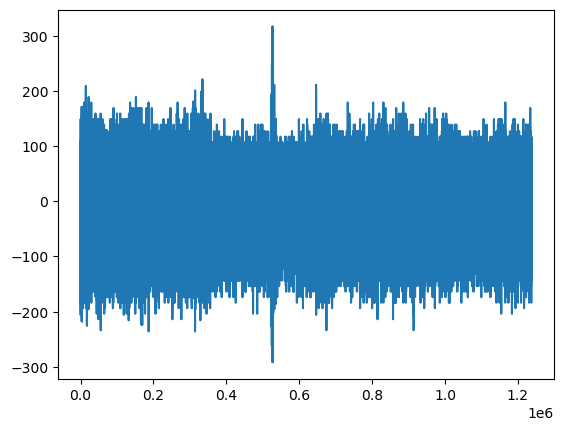

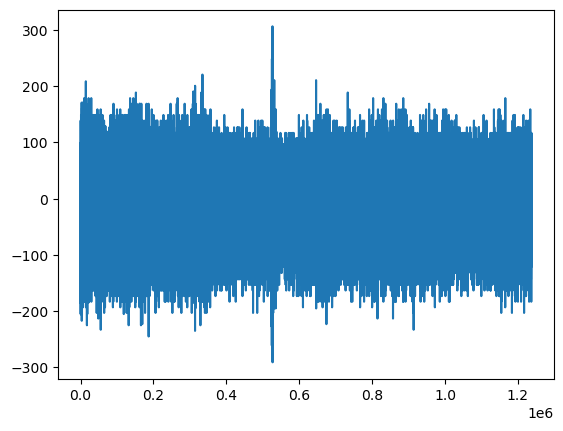

In [3]:
import matplotlib.pyplot as plt
from scipy.io import wavfile as wav

rate, data = wav.read(filename)
%matplotlib inline
plt.plot(data[:,0])
plt.show()
plt.plot(data[:,1])
plt.show()

In [4]:
# MFCC 계산
# librosa load : sr=22050, ch=mono로 변환되어서 load됨

y, sr = librosa.load(filename)

mfcc_y=librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40, n_fft=1024, hop_length=512)
np.shape(mfcc_y)

(40, 1209)

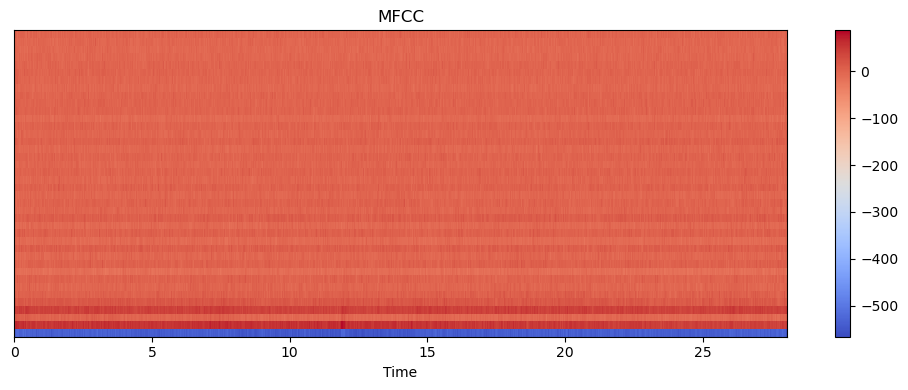

In [5]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 4))
librosa.display.specshow(mfcc_y, x_axis='time')
plt.colorbar()
plt.title('MFCC')
plt.tight_layout()
plt.show()

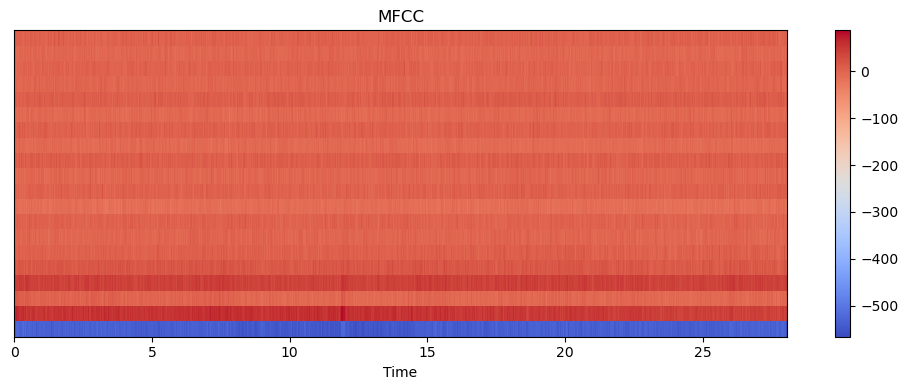

In [6]:
mfcc_y=librosa.feature.mfcc(y=y, sr=sr, n_mfcc=20, n_fft=1024, hop_length=512)
np.shape(mfcc_y)

plt.figure(figsize=(10, 4))
librosa.display.specshow(mfcc_y, x_axis='time')
plt.colorbar()
plt.title('MFCC')
plt.tight_layout()
plt.show()

Processing 6.가전_18964_1.wav
Number of channels: 1
Sampling rate: 44100
Number of samples: 445376
Play time(s): 10.09922902494331


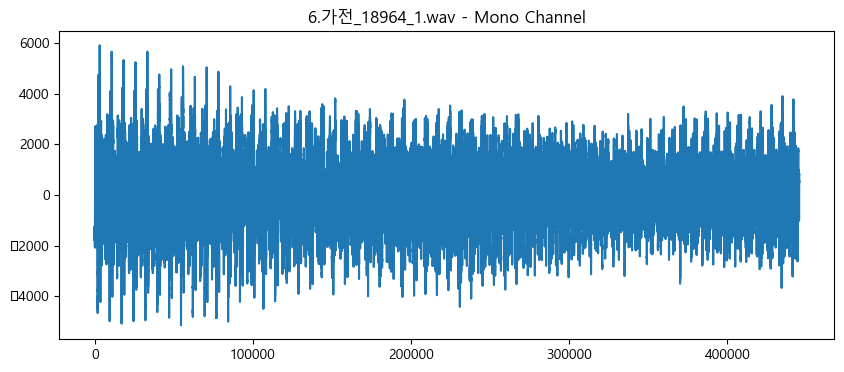

C:\Users\USER\AppData\Local\Temp\ipykernel_9912\3980907892.py:62: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.tight_layout()


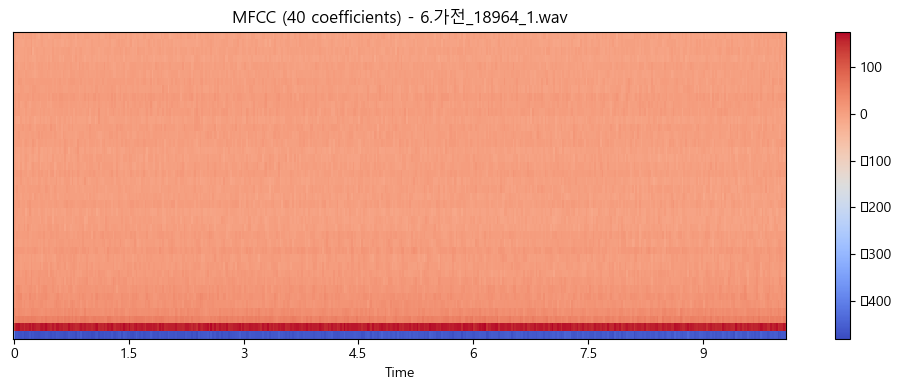

C:\Users\USER\AppData\Local\Temp\ipykernel_9912\3980907892.py:71: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.tight_layout()


KeyboardInterrupt: 

In [11]:
# 한번에 여러개 뽑아내기
import os
import librosa
import librosa.display
import numpy as np
import wave
import matplotlib.pyplot as plt
from scipy.io import wavfile as wav
import matplotlib.font_manager as fm

# 한글로 쓰기
plt.rc('font', family='Malgun Gothic')

# 오디오 파일이 저장된 폴더 경로
folder_path = './wav/'

# 폴더 내의 모든 파일을 반복 처리
for filename in os.listdir(folder_path):
    if filename.endswith('.wav'):
        file_path = os.path.join(folder_path, filename)
        
        # 파일 정보 출력
        obj = wave.open(file_path, 'r')
        print(f"Processing {filename}")
        print("Number of channels:", obj.getnchannels())
        print("Sampling rate:", obj.getframerate())
        print("Number of samples:", obj.getnframes())
        print("Play time(s):", obj.getnframes() / obj.getframerate())
        obj.close()

        # WAV 파일 읽기
        rate, data = wav.read(file_path)

        # 모노인지 스테레오인지 확인
        if len(data.shape) == 1:  # 모노
            plt.figure(figsize=(10, 4))
            plt.plot(data)
            plt.title(f'{filename} - Mono Channel')
            plt.show()
        else:  # 스테레오
            # 왼쪽 채널 데이터 플롯
            plt.figure(figsize=(10, 4))
            plt.plot(data[:, 0])
            plt.title(f'{filename} - Left Channel')
            plt.show()

            # 오른쪽 채널 데이터 플롯
            plt.figure(figsize=(10, 4))
            plt.plot(data[:, 1])
            plt.title(f'{filename} - Right Channel')
            plt.show()

        # Librosa를 사용하여 오디오 파일 로드
        y, sr = librosa.load(file_path)

        # MFCC 계산 (40개 계수)
        mfcc_y = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40, n_fft=1024, hop_length=512)
        plt.figure(figsize=(10, 4))
        librosa.display.specshow(mfcc_y, x_axis='time')
        plt.colorbar()
        plt.title(f'MFCC (40 coefficients) - {filename}')
        plt.tight_layout()
        plt.show()

        # MFCC 계산 (20개 계수)
        mfcc_y = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=20, n_fft=1024, hop_length=512)
        plt.figure(figsize=(10, 4))
        librosa.display.specshow(mfcc_y, x_axis='time')
        plt.colorbar()
        plt.title(f'MFCC (20 coefficients) - {filename}')
        plt.tight_layout()
        plt.show()
